<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Исследование структуры данных

## 1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [161]:
hh_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

## 2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [162]:
display(hh_df.tail())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
44739,"Мужчина , 30 лет , родился 17 января 1989",50000 руб.,"Финансист, аналитик, экономист, бухгалтер, мен...","Тверь , готов к переезду (Москва, Химки) , гот...",полная занятость,"полный день, удаленная работа","Опыт работы 7 лет 7 месяцев Финансист, аналит...","ООО ""IAS"" (независимый участник объединения Ru...",Руководитель субгруппы,Высшее образование 2015 Московский гуманитарн...,22.04.2019 12:32,Не указано
44740,"Мужчина , 27 лет , родился 5 марта 1992",39000 руб.,"Системный администратор, IT-специалист","Липецк , готов к переезду , готов к командировкам","проектная работа, частичная занятость, полная ...","удаленная работа, гибкий график, полный день, ...","Опыт работы 7 лет Системный администратор, IT...",ИП Пестрецов,Предприниматель,Высшее образование (Бакалавр) 2016 Воронежски...,22.04.2019 13:11,Не указано
44741,"Женщина , 48 лет , родилась 26 декабря 1970",40000 руб.,"Аналитик данных, Математик","Челябинск , готова к переезду , готова к редки...",полная занятость,"полный день, удаленная работа",Опыт работы 21 год 5 месяцев Январь 1998 — по...,"ОАО «ЧМК», Исследовательско-Технологический Це...",Начальник группы аналитики,Высшее образование 2000 Южно-Уральский госуда...,09.04.2019 05:07,Не указано
44742,"Мужчина , 24 года , родился 6 октября 1994",20000 руб.,Контент-менеджер,"Тамбов , не готов к переезду , не готов к кома...","частичная занятость, полная занятость",удаленная работа,Опыт работы 3 года 10 месяцев Контент-менедже...,IQ-Maxima,Менеджер проектов,Высшее образование 2015 Тамбовский государств...,26.04.2019 14:25,Имеется собственный автомобиль
44743,"Мужчина , 38 лет , родился 25 апреля 1980",120000 руб.,Руководитель проекта,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 15 лет 10 месяцев Руководитель пр...,ПАО ГК ТНС энерго,Руководитель отдела технической поддержки,Высшее образование 1997 Южно-Российский госуд...,05.07.2018 20:15,Не указано


## 3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [163]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

## 4. Обратите внимание на информацию о числе непустых значений.

In [164]:
coll_not_null_percent = (1 - hh_df.isnull().mean()) * 100
display(coll_not_null_percent.round(3))

Пол, возраст                       100.000
ЗП                                 100.000
Ищет работу на должность:          100.000
Город, переезд, командировки       100.000
Занятость                          100.000
График                             100.000
Опыт работы                         99.625
Последнее/нынешнее место работы     99.998
Последняя/нынешняя должность        99.996
Образование и ВУЗ                  100.000
Обновление резюме                  100.000
Авто                               100.000
dtype: float64

## 5. Выведите основную статистическую информацию о столбцах.


In [165]:
hh_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

## 1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [166]:
def get_education_type(education):
    """Создание нового признака на основании текущего признака 'Образование'
    выявление из объекта ключевой информации и присвоение новому признаку одной из 4 категорий:
    - 'Высшее'
    - 'Неоконченное высшее'
    - 'Среднее специальное'
    - 'Среднее'

    Args:
        education (str): содержет строку, в первых двух словах находится ключевой признак
    
    Returns:
        str: одна из 4 категорий, или если нет совподений возвращается 'other'
    """
    # Оставляем в education только первые два слова
    education = ' '.join(education.split(' ')[:2])
    
    # Проверяем нахождения ключевого слова (слов) в education
    # И возвращаем категорию
    if 'Высшее' in education:
        return 'Высшее'
    elif 'Неоконченное высшее' in education:
        return 'Неоконченное высшее'
    elif 'Среднее специальное' in education:
        return 'Среднее специальное'
    elif 'Среднее образование' in education:
        return 'Среднее'
    else:
        return np.nan
    
# Применение функции и преобразование формата данных в тип 'category'
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(get_education_type).astype('category')
# Проверка полученных категорий.
print('Получены категории:')
print(hh_df['Образование'].cat.categories)
print('Как и планировалось после преобразования данных получили 4 катеогории.')
print('')

# Как и планировалось после преобразования данных получили 4 катеогории.
# Отсортируем категории согласно спика category_list.
category_list = ['Среднее', 'Среднее специальное', 'Неоконченное высшее', 'Высшее']
hh_df['Образование'] = hh_df['Образование'].cat.reorder_categories(category_list, ordered=True)
display(hh_df['Образование'])
print('')

# Теперь удалим признак 'Образование и ВУЗ' из таблицы.
hh_df.drop(['Образование и ВУЗ'], axis=1, inplace=True)

# Контрольное задание 3.1
print('Контрольное задание 3.1:')
print_f1 = hh_df[hh_df['Образование'] == 'Среднее'].shape[0]
print(f'{print_f1} человек имеют среднее образование')

Получены категории:
Index(['Высшее', 'Неоконченное высшее', 'Среднее', 'Среднее специальное'], dtype='object')
Как и планировалось после преобразования данных получили 4 катеогории.



0        Неоконченное высшее
1                     Высшее
2        Среднее специальное
3                     Высшее
4                     Высшее
                ...         
44739                 Высшее
44740                 Высшее
44741                 Высшее
44742                 Высшее
44743                 Высшее
Name: Образование, Length: 44744, dtype: category
Categories (4, object): ['Среднее' < 'Среднее специальное' < 'Неоконченное высшее' < 'Высшее']


Контрольное задание 3.1:
559 человек имеют среднее образование


## 2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [167]:
def get_sex_type(data):
    """Создаем новый признак 'Пол' на основе данных из признака 'Пол, возраст'.
    Признак будет иметь два строковых значения 'М' - мужчина, 'Ж' - Женщина.

    Args:
        data (str): Значение в строке содержет 'Пол', 'Возраст', 'Дату рождения',
        разделенные символом ' , '
    Returns: str, одно из значений пола 'М' или 'Ж'
    """
    
    if 'Мужчина' in data:
        return 'М'
    else:
        return 'Ж'
    
def get_age(data):
    """Функция извлекает возраст из входной строки

    Args:
        data (str): Строка, содержащая информацию о возрасте
    
    Returns:
        (str): Возраст - количество полных лет
    """
    # создаем список слов из строки, разделяя слова пробелом.
    data_list = data.split(' ')
    # создаем список ключевых слов для поиска количества лет.
    year_words = ['год', 'года', 'лет']
    # Находим количество лет
    for index, item in enumerate (data_list):
        if item in year_words:
            return int(data_list[index-1])

# Создаем новые признаки
hh_df['Пол'] = hh_df['Пол, возраст'].apply(get_sex_type).astype('category')
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(get_age)
# Удаляем ненужный признак
hh_df.drop(columns=['Пол, возраст'], axis=1, inplace=True)

#контрольное задание 3.2
print('контрольное задание 3.2:')
print_f1 = round(hh_df['Пол'].value_counts(normalize=True)['Ж'] * 100, 2)
print(f"Среди соискателей представленно {print_f1}% резюме женщин")

print_f2 = round(hh_df['Возраст'].mean(), 2)
print(f"Средний возраст соискателей составляет {print_f2} года")

контрольное задание 3.2:
Среди соискателей представленно 19.07% резюме женщин
Средний возраст соискателей составляет 32.2 года


## 3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [168]:
def get_experience(arg):
    """Функция определяет опыт работы из входной строки

    Args:
        arg (str): Строка, содержащая информацию об опыте работы
    Returns:
        (int):Возвращает суммарный трудовой опыт в месяцах
    """
    
    if arg is np.nan or arg == 'Не указано':
        return np.nan
    year_words = ['год', 'года', 'лет']
    mounth_words = ['месяц', 'месяца', 'месяцев']
    
    arg_list = arg.split(' ')[:7]
    years = 0
    mounths = 0
    
    for index, item in enumerate(arg_list):
        if item in year_words:
            years = int(arg_list[index-1])
        elif item in mounth_words:
            mounths = int(arg_list[index-1])
    return years * 12 + mounths

# Создадим новый признаки и удалим признак 'Опыт работы'
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_experience)
hh_df.drop(columns='Опыт работы', inplace=True)

# Контрольное задание 3.3
print('Контрольное задание 3.3:')
print_f = round(hh_df['Опыт работы (месяц)'].median())
print(f"Медианный опыт работы составляет {print_f} месяцев")


Контрольное задание 3.3:
Медианный опыт работы составляет 100 месяцев


## 4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [169]:
def get_city(city):
    """Функция извлекает город проживания из начала входной строки

    Args:
        city (str): Строка, содержащая информацию из признака 'Город, переезд, командировки'
    Returns:
        [str]: Строка с одним из 4 значений: Москва, Санкт-Петербург, город-миллионник или другие
    """
    # Список городов милионников
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']
    # Получим из строки город
    city = city.split(sep=' , ', maxsplit=1)[0]
    # Ищем города 'Москва' или 'Санкт-Петербург'
    if (city=='Москва') or (city=='Санкт-Петербург'):
        return city
    # Если город из списка городов миллиоников
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

def get_ready_to_move(mobility):
    """Функция извлекает информацию о готовности к переездам из входной строки.
        Критерий: содержание ключевых слов.

    Args:
        mobility (str): Строка, содержащая информацию из признака 'Город, переезд, командировки'
    Returns:
        [bool]: True - готов к переездам, False - не готов.
    """
    
    if ('не готов к переезду' in mobility) or ('не готова к переезду' in mobility):
        return False
    else:
        return True

def get_ready_for_bisiness_trips(trips):
    """Функция извлекает информацию о готовности к командировкам из входной строки.
        Критерий: содержание ключевых слов.

    Args:
        trips (str): Строка, содержащая информацию из признака 'Город, переезд, командировки'
    Returns:
        [bool]: True - готов к командировкам, False - не готов.
    """
    # Проверим наличие информации о готовности к командировкам
    if ('командировка' in trips):
        # Проверим готовность к командировкам
        if ('не готов к командировкам' in trips) or ('не готова к командировкам' in trips):
            return False
        else:
            return True
    else:
        return False

# Создадим новые признаки
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city).astype('category')
hh_df['Готовность к переездам'] = hh_df['Город, переезд, командировки'].apply(get_ready_to_move)
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
# Отсортируем категории согласно спика category_list.
category_list = ['Москва', 'Санкт-Петербург', 'город-миллионник', 'другие']
hh_df['Город'] = hh_df['Город'].cat.reorder_categories(category_list, ordered=True)
# Удаляем ненужный признак
hh_df.drop(columns='Город, переезд, командировки', inplace=True)

# Контрольное задание 3.4
print('Контрольное задание 3.4:')
print_f1 = round(hh_df['Город'].value_counts(normalize=True)['Санкт-Петербург']*100)
print(f"Среди соискателей в Санкт-Петербурге живут {print_f1}%")

mask1 = hh_df['Готовность к переездам'] & hh_df['Готовность к командировкам']
print_f2 = round(hh_df[mask1].count()[1]/hh_df.shape[0]*100)
print(f"Доля соискателей готовых к переезду и командировкам составляет {print_f2}%")        

Контрольное задание 3.4:
Среди соискателей в Санкт-Петербурге живут 11%
Доля соискателей готовых к переезду и командировкам составляет 32%


## 5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>

Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [170]:
# Получение списка уникальных значений из признака 'Занятость'
employments = hh_df['Занятость'].unique()
employments = [x.split(sep=', ') for x in employments]
employments = [x for y in employments for x in y]
employments = list(set(employments))

# Получение списка уникальных значений из признака 'График'
charts = hh_df['График'].unique()
charts = [x.split(sep=', ') for x in charts]
charts = [x for y in charts for x in y]
charts = list(set(charts))

# Создание признаков-мигалок из признака 'Занятость'
for employment in employments:
    hh_df[employment] = hh_df['Занятость'].apply(lambda x: employment in x)

# Создание признаков-мигалок из признака 'График'
for chart in charts:
    hh_df[chart] = hh_df['График'].apply(lambda x: chart in x)
    
# Удалим ненужные данные
hh_df.drop(columns=['Занятость', 'График'], axis=1, inplace=True)

# Контрольное задание 3.5
print('Контрольное задание 3.5:')
print_f1 = hh_df[hh_df['проектная работа'] & hh_df['волонтерство']].shape[0]
print(f"Среди соискателей проектную работу или волонтёрство ищут {print_f1} человек")

print_f2 = hh_df[hh_df['вахтовый метод'] & hh_df['гибкий график']].shape[0]
print(f"Среди соискателей хотят работать вахтовым методом или с гибким графиком {print_f2} человек")

Контрольное задание 3.5:
Среди соискателей проектную работу или волонтёрство ищут 436 человек
Среди соискателей хотят работать вахтовым методом или с гибким графиком 2311 человек


## 6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [171]:
def get_salary_num(sal_num):
    """ Функция получает численное значение предполагаемой зарплаты

    Args:
        sal_num (str): Строка содержащее численное значение предполагаемой зарплаты в начале строки

    Returns:
        (float): Численное значение предполагаемой зарплаты
    """
    salary = float(sal_num.split(' ')[0])
    return salary

def get_salary_currency(sal_cur):
    """Функция считывает наименование валюты и если она не соответствует международному стандарту,
        возвращает стандартное наименование

    Args:
        sal_cur (str): Строка содержащая наименование валюты

    Returns:
        (str): Наименование валюты в стандартном виде
    """
    
    # Словарь для преобразования наименование валюты в международный стандарт
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN',
        'руб': 'RUB'
    }
    
    # Получим наименование валюты (второе слово) и удалим знак '.'
    curr = sal_cur.split(' ')[1].replace('.','')
    return currency_dict[curr]

# Загружаем таблицу истории котировок Рубля к другим валютам 
rates = pd.read_csv('data/ExchangeRates.csv', sep=',')

# Преобразуем формат даты к общему типу
rates['date'] = pd.to_datetime(rates['date']).dt.date
hh_df['Обновление резюме'] = pd.to_datetime(hh_df['Обновление резюме']).dt.date

# Получаем временные признаки для вычисления заработной платы
hh_df['ЗП (tmp)'] = hh_df['ЗП'].apply(get_salary_num)
hh_df['Курс (tmp)'] = hh_df['ЗП'].apply(get_salary_currency)

# Объединяем таблицу с таблицей котировок по наименованию валюты и даты
merged = hh_df.merge(
    right=rates,
    left_on= ['Курс (tmp)','Обновление резюме'],
    right_on= ['currency', 'date'],
    how='left'
)

# Заполним столбец close и proportion значением 1
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)

# Создаем признак заработной платы в руб.
hh_df['ЗП (руб)'] = merged['ЗП (tmp)'] * merged['close'] / merged['proportion']

# Удалим ненужные признаки
hh_df.drop(columns=['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1, inplace=True)

# Контрольное задание 3.6
print('Контрольное задание 3.6:')
print_f = round(hh_df['ЗП (руб)'].median()/1000)
print(f"Медианная заработная плата соискателей составляет {print_f} тысяч рублей")

Контрольное задание 3.6:
Медианная заработная плата соискателей составляет 59 тысяч рублей


In [172]:
hh_df.to_csv('data/hh_database_preprocessed.csv', index=False)

# Исследование зависимостей в данных

## 1. Постройте распределение признака **"Возраст"**.
Опишите распределение, отвечая на следующие вопросы:
* Чему равна мода распределения?
* Каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей?
* Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

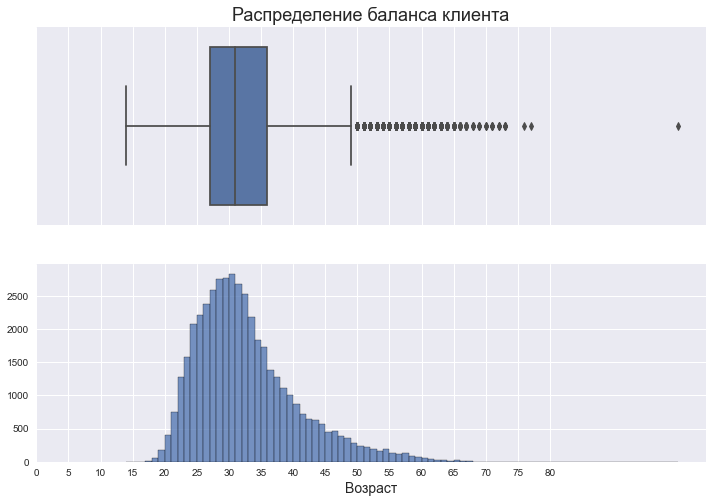

Контрольное задание 4.1:
Модальное значение возраста соискателей: 30 лет


In [173]:
plt.style.use('seaborn')
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(12,8))
sns.boxplot(
    data=hh_df,
    x='Возраст',
    ax=axes[0]
)
sns.histplot(
    data=hh_df,
    x='Возраст',
    ax=axes[1],
    binwidth=1
)
axes[0].set_title('Распределение баланса клиента',fontsize=18)
axes[0].set_xlabel(xlabel='')
axes[0].set_xticks(range(0,85,5))
axes[0].set_xticklabels('')
axes[1].set_xlabel(xlabel='Возраст', fontsize=14)
axes[1].set_ylabel(ylabel='')
axes[1].set_xticks(range(0,85,5))

plt.show()

# Контрольное задание 4.1
print('Контрольное задание 4.1:')
print_f1 = hh_df['Возраст'].mode().values[0]
print('Модальное значение возраста соискателей:', print_f1, 'лет')

Выводы:
1. Распределение возраста соискателей близко к нормальному с ассиметрией вправо.
2. Мода распределения составляет 30 лет.
3. Минимальное и максимальное значения признака составляют 14 и 100 лет соответственно.
4. Возраст большинства соискателей находится в интервале от 18 до 49 лет. Межквартильный диапазон составляет от 27 до 36 лет.
5. На распределении наблюдается одно аномальное значение - это соискатель с возрастом 100 лет.

## 2. Постройте распределение признака **"Опыт работы (месяц)"**.
Опишите данное распределение, отвечая на следующие вопросы:
* Чему равна мода распределения?
* Каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей?
* Есть ли аномалии для признака опыт работы, какие значения вы бы причислили к их числу?

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

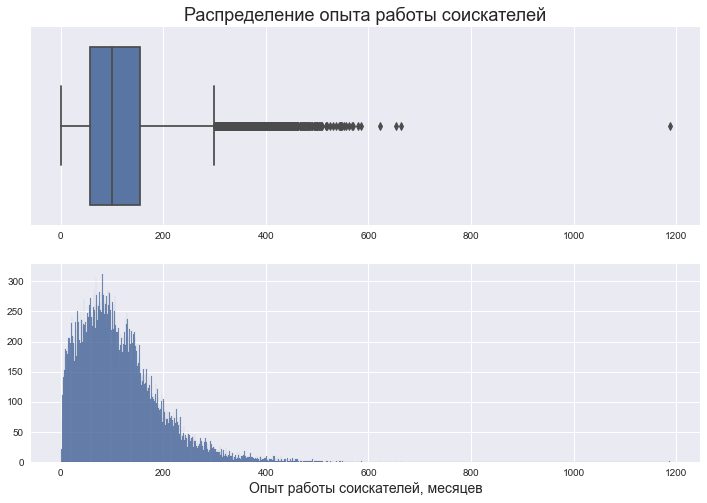

Контрольное задание 4.2:
Максимальный опыт работы: 1188 месяцев


In [174]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(12,8))
sns.boxplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    ax=axes[0]
)
sns.histplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    ax=axes[1],
    binwidth=1
)
axes[0].set_title('Распределение опыта работы соискателей',fontsize=18)
axes[0].set_xlabel(xlabel='')
axes[1].set_xlabel(xlabel='Опыт работы соискателей, месяцев', fontsize=14)
axes[1].set_ylabel(ylabel='')

plt.show()

# Контрольное задание 4.2
print('Контрольное задание 4.2:')
print_f1 = round(hh_df['Опыт работы (месяц)'].max())
print('Максимальный опыт работы:', print_f1, 'месяцев')

Выводы:
1. Опыт работы также имеет вид нормального распределения с ассиметрией вправо.
2. Мода распределения находится в интервале от 80 до 84 месяцев, если точно 81 месяц.
3. Минимальное и максимальное значения признака составляют 1 и 1188 месяцев соответственно.
4. Опыт большинства соискателей находится в интервале от 1 до 300 месяцев. Межквартильный диапазон составляет от 57 до 154 месяцев.
5. На распределении наблюдается одна аномалия 1188 месяцев, что равно 99 годам рабочего стажа.

## 3. Постройте распределение признака **"ЗП (руб)"**.
Опишите данное распределение, отвечая на следующие вопросы:
* Чему равна мода распределения?
* Каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей?
* Есть ли аномалии для признака заработной платы? Обратите внимание на гигантские размеры желаемой заработной платы.

*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

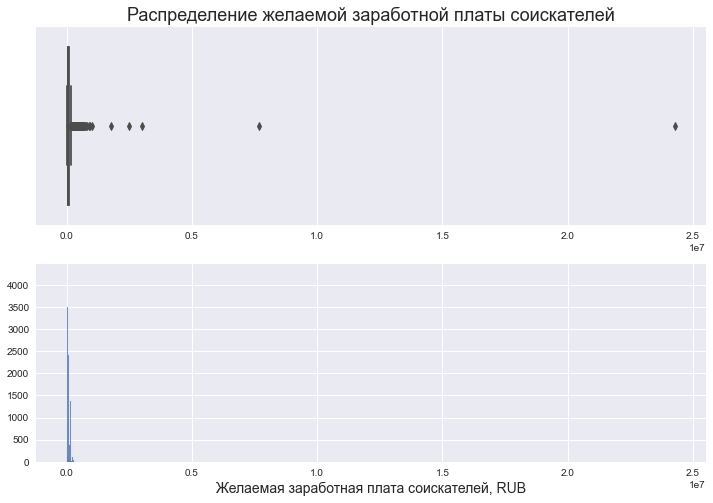

In [175]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(12,8))
sns.boxplot(
    data=hh_df,
    x='ЗП (руб)',
    ax=axes[0]
)
sns.histplot(
    data=hh_df,
    x='ЗП (руб)',
    ax=axes[1],
    #binwidth=1
)
axes[0].set_title('Распределение желаемой заработной платы соискателей',fontsize=18)
axes[0].set_xlabel(xlabel='')
axes[1].set_xlabel(xlabel='Желаемая заработная плата соискателей, RUB', fontsize=14)
axes[1].set_ylabel(ylabel='')

plt.show()

Выводы:
1. Полученные графики нельзя анализировать.

## 4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**).
Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.

*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

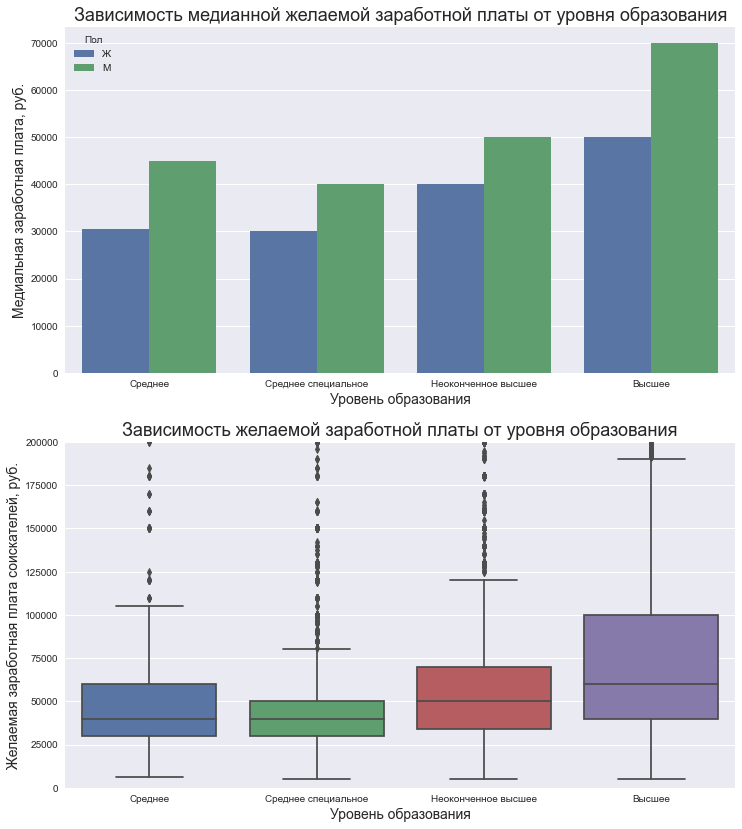

In [176]:
mask1 = (hh_df['ЗП (руб)']<1e6) & (hh_df['ЗП (руб)']>=5e3)
bar_data = hh_df[mask1].groupby(by=['Образование','Пол'], as_index=False).median()

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(12,14))
sns.barplot(
    data=bar_data,
    x='Образование',
    y='ЗП (руб)',
    hue='Пол',
    ax=axes[0]
)
sns.boxplot(
    data=hh_df[mask1],
    x='Образование',
    y='ЗП (руб)',
    ax=axes[1],
)
axes[0].set_title('Зависимость медианной желаемой заработной платы от уровня образования',fontsize=18)
axes[0].set_xlabel(xlabel='Уровень образования', fontsize=14)
axes[0].set_ylabel(ylabel='Медиальная заработная плата, руб.', fontsize=14)
axes[1].set_title('Зависимость желаемой заработной платы от уровня образования',fontsize=18)
axes[1].set_xlabel(xlabel='Уровень образования', fontsize=14)
axes[1].set_ylabel(ylabel='Желаемая заработная плата соискателей, руб.', fontsize=14)
axes[1].set(ylim=(0,2e5))
plt.show()

Выводы:
1. Самый высокий уровень желаемой заработной платы (60 тыс.руб.) и самый большой разброс у соискателей с высшим образованием. Люди с высшим образованием ценятся больше это естественно, разброс скорее всего обусловлен востребованностью специфических навыков, что указывает на некоторый дефицит. Следует больше внимания уделить анализу рынка и специализации соискателей с высшим образованием.
2. Самый низкий уровень (40 тыс.руб.) и самый узкий разброс заработной платы у соискателей  со среднеспециальным образованием. Данная тенденция наиболее вероятно тоже связана с конкуренцией на рынке труда - т.е. рынок насыщен и стоимость рабочей силы приблизилась к равновесной цене.
3. Если дополнительно рассмотреть распределение в разрезе полового признака, то следует отметить тенденцию женщин указывать меньшую заработную плату, чем мужчины с таким же уровнем образования.
4. Уровень образования несомненно является важным признаком при прогнозировании желаемой зарплаты соискателей.

## 5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**).
Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.

*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

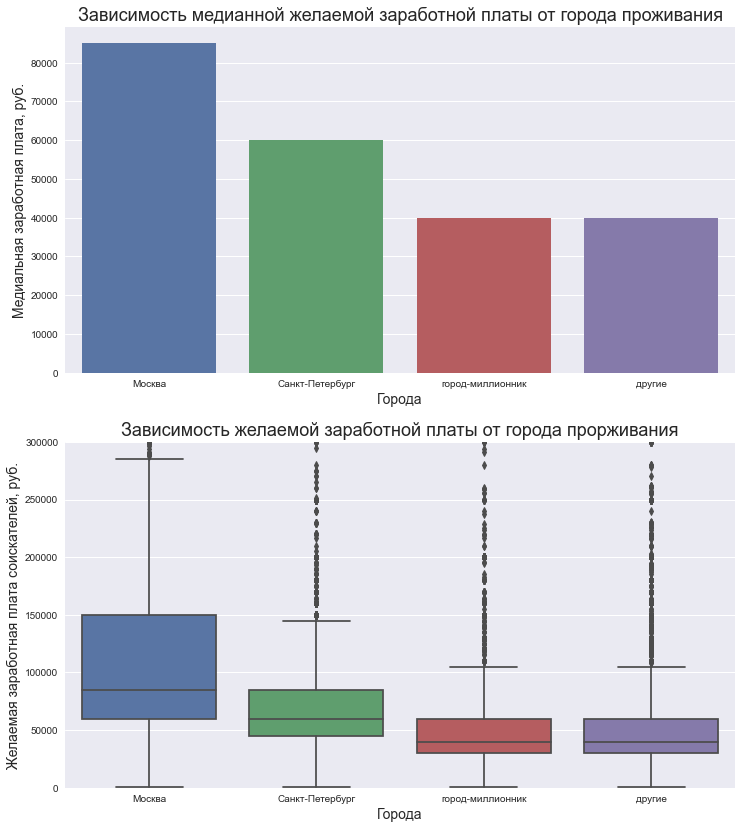

In [193]:
# Сгруппируем данные по признаку Город
mask1 = (hh_df['ЗП (руб)']<1e6) & (hh_df['ЗП (руб)']>=1e3)
bar_data = hh_df[mask1].groupby(by=['Город'], as_index=False).median()

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(12,14))
sns.barplot(
    data=bar_data,
    x='Город',
    y='ЗП (руб)',
    ax=axes[0]
)
sns.boxplot(
    data=hh_df[mask1],
    x='Город',
    y='ЗП (руб)',
    ax=axes[1]
)

axes[0].set_title('Зависимость медианной желаемой заработной платы от города проживания',fontsize=18)
axes[0].set_xlabel(xlabel='Города', fontsize=14)
axes[0].set_ylabel(ylabel='Медиальная заработная плата, руб.', fontsize=14)
axes[1].set_title('Зависимость желаемой заработной платы от города прорживания',fontsize=18)
axes[1].set_xlabel(xlabel='Города', fontsize=14)
axes[1].set_ylabel(ylabel='Желаемая заработная плата соискателей, руб.', fontsize=14)
axes[1].set(ylim=(0,3e5))
plt.show()

Выводы:
1. В городах-миллионниках и городах из категории другие наблюдаются идентичные медианные заработные платы и разброс 40 и 105 тыс.руб. соответственно.
2. В столице медианная зароботная плата составляет 85 тыс.руб., что более чем в 2 раза больше чем в большинстве городов России. Разброс в заработной плате больше почти в 3 раза - 285 тыс.руб.
3. Санкт-Петербург занимает промежуточное место между Москвой и остальной частью России по медианной заработной плате - составляющей 60 тыс.руб. и разбросу - 145 тыс.руб.
4. Москва - густонаселенный город и проживание в нем стоит дороже, чем в остальной части России. Условия проживания определенно оказывают влияние на уровень желаемой заработной платы и это тоже является важным признаком в прогнозировании.

## 6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**.
Проанализируйте график, сравнив уровень заработной платы в категориях.

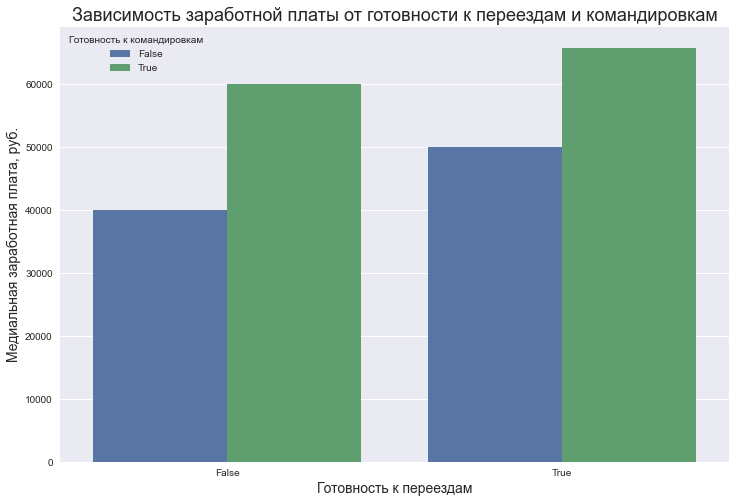

In [178]:
# Сгруппируем данные по признакам 'Готовность к командировкам' и 'Готовность к переездам'
bar_data = hh_df.groupby(
    by=['Готовность к переездам', 'Готовность к командировкам'],
    as_index=False
)['ЗП (руб)'].median()

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 8))
sns.barplot(
    data=bar_data,
    x='Готовность к переездам',
    y='ЗП (руб)',
    hue='Готовность к командировкам',
    errwidth=0,
    ax=axes
)

axes.set_title('Зависимость заработной платы от готовности к переездам и командировкам',fontsize=18)
axes.set_xlabel(xlabel='Готовность к переездам', fontsize=14)
axes.set_ylabel(ylabel='Медиальная заработная плата, руб.', fontsize=14)
plt.show()

Выводы:
1. Соискатели указавшие готовность к переездам и командировкам указывают большую желаемую заработную плату медианное значение 68 тыс.руб.
2. С точки зрения соискателей готовность к командировкам стоит больше, чем готовность к переезду примерно на 10 тыс.руб.
3. Разница в желаемой заработной плате между соискателями готовыми к переездам и командировкам и соискателями не желающими переезжать и ездить по командировкам составляет 28 тыс. руб.

Коментарий:
Ответ на задание 4.6 нашел перебором.

## 7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

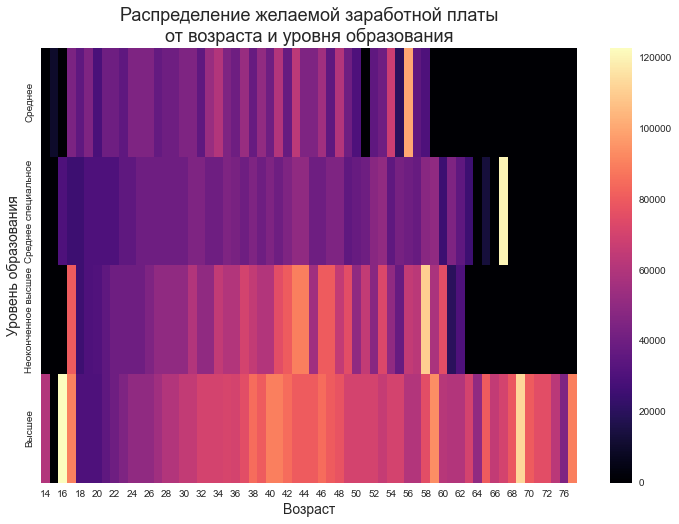

In [179]:
mask1 = (hh_df['ЗП (руб)'] < 1e6) & (hh_df['ЗП (руб)'] >= 5e3)
mask2 = hh_df['Возраст'] < 100
pivot = hh_df[mask1 & mask2].pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 8))
sns.heatmap(
    data=pivot,
    cmap='magma',
)

axes.set_title('Распределение желаемой заработной платы\nот возраста и уровня образования',fontsize=18)
axes.set_xlabel(xlabel='Возраст', fontsize=14)
axes.set_ylabel(ylabel='Уровень образования', fontsize=14)
plt.show()

Выводы:
1. На диаграмме проявились новые аномалии: например высшее образование у соискателей в возрасте до 17 лет, а также требование зарплаты 120 тыс. руб. со среднеспециальным образованием и пенсионным возрастом 67 лет.
2. В среднем на всех 4 категориях уровня образования просматривается равномерное увеличение желаемой заработной платы от 18 до 40 лет и уменьшение приближаясь к пенсионному возрасту.
3. Наибольшая интенсивность увеличения заработной платы и наиболее плавная наблюдается у соискателей с высшим образованием, самая низкая интенсивность роста заработной платы у соискателей со среднеспециальным образованием.
4. Во всех четырех категориях образования наблюдается наибольшая неравномерность в желаемой заработной плате в возрасте от 50 до 65, а у соискателей с высшим образованием до 75 лет. Высокие заработные платы для соискателей данных возрастных групп могут быть обусловленны наличием уникальных навыков и знаний, что указывает на потребность анализа рынка труда по специализации для лиц с высшим и неоконченным высшим образованием.
5. Соискатели с высшим образованием сохраняют работоспособность до глубокой старости, при этом стремятся поддерживать уровень своего благосостояния на высоком уровне, сравнимом с 30-35 летними соискателями такого же уровня образования.

## 8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**).
 Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

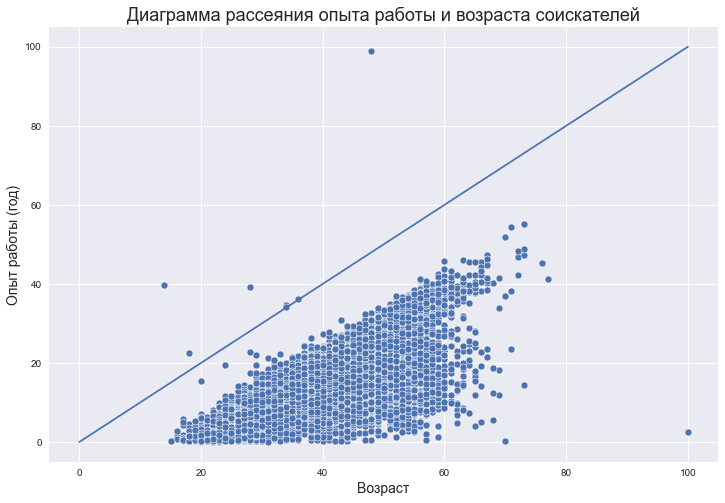

Контрольное задание 4.8:
Количество выбросов по соотношению опыта работы и возраста 7 шт.


In [180]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(12, 8))
scatter_data = hh_df.copy()
scatter_data['Опыт работы (год)'] = scatter_data['Опыт работы (месяц)']/12
sns.lineplot(
    x=[0,100],
    y=[0,100]
)
sns.scatterplot(
    data=scatter_data,
    x='Возраст',
    y='Опыт работы (год)'
)

axes.set_title('Диаграмма рассеяния опыта работы и возраста соискателей',fontsize=18)
axes.set_xlabel(xlabel='Возраст', fontsize=14)
axes.set_ylabel(ylabel='Опыт работы (год)', fontsize=14)
plt.show()

# Контрольное задание 4.8
print('Контрольное задание 4.8:')
print_f1 = scatter_data[scatter_data['Опыт работы (год)']>=scatter_data['Возраст']].shape[0]
print(f'Количество выбросов по соотношению опыта работы и возраста {print_f1} шт.')

Выводы:
1. На диаграмме проявились аномальные/ошибочные данные: 7 точек лежащие на границе области где опыт работы больше возраста и над ней.
2. Так же вызывают сомнения в достоверности данные об опыте работы с разницей с возрастом менее 14 лет. Т.е. соискатели которые начали трудовую деятельность не достигнув трудоспособного возраста по законодательству РФ.
3. К аномалиям следуе отнести и точку с возрастом 100 лет и стажем 2,5 года. Даже если это достоверная информация её можно считать единичным выбросом.
На основе полученных данных следует исключить данные записи из рассмотрения.

## **Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


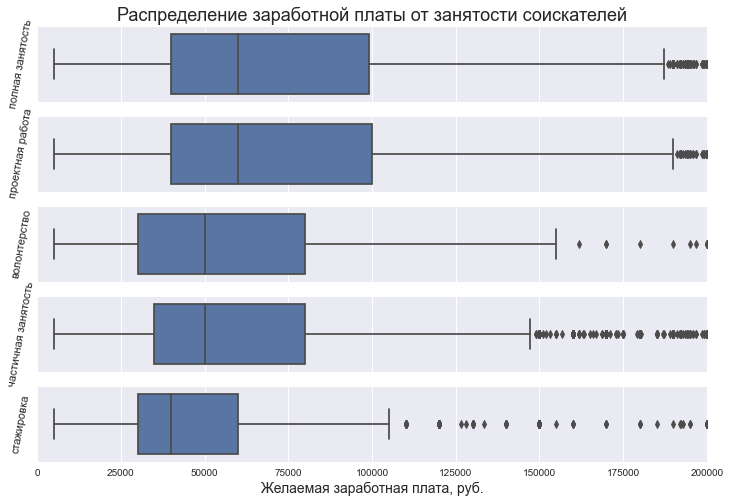

In [181]:
mask1 = (hh_df['ЗП (руб)'] < 1e6) & (hh_df['ЗП (руб)'] >= 5e3)

fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize=(12,8))
for index, item in enumerate(employments):
    sns.boxplot(
        data=hh_df[mask1 & hh_df[item]],
        x='ЗП (руб)',
        ax=axes[index]
    )
    axes[index].set(xlim=(0,2e5))
    axes[index].set_ylabel(ylabel=item, rotation = 80)
    if not index == 4:
        axes[index].set_xlabel(xlabel='')
        axes[index].set_xticklabels('')
axes[0].set_title('Распределение заработной платы от занятости соискателей',fontsize=18)
axes[4].set_xlabel(xlabel='Желаемая заработная плата, руб.', fontsize=14)
plt.show()

Выводы:
1. Самая высокая медианная заработная плата у категорий полная занятость и проектная работа по 60 тыс.руб. Распределения практически идентичны, наверное целесообразно будет объединить их в одну категорию.
2. На втором месте по медианной заработной плате 50 тыс. руб. и тоже со схожими распределениями находятся категории частичной занятости и волонтерства.
3. Категорией с наименьшей медианной заработной платой 40 тыс. руб. является стажировка

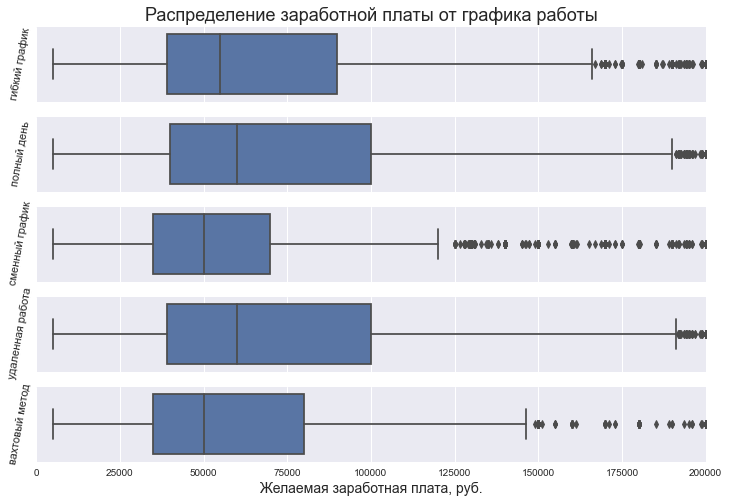

In [182]:
mask1 = (hh_df['ЗП (руб)'] < 1e6) & (hh_df['ЗП (руб)'] >= 5e3)

fig, axes = plt.subplots(nrows = 5, ncols = 1, figsize=(12,8))
for index, item in enumerate(charts):
    sns.boxplot(
        data=hh_df[mask1 & hh_df[item]],
        x='ЗП (руб)',
        ax=axes[index]
    )
    axes[index].set(xlim=(0,2e5))
    axes[index].set_ylabel(ylabel=item, rotation = 80)
    if not index == 4:
        axes[index].set_xlabel(xlabel='')
        axes[index].set_xticklabels('')
axes[0].set_title('Распределение заработной платы от графика работы',fontsize=18)
axes[4].set_xlabel(xlabel='Желаемая заработная плата, руб.', fontsize=14)
plt.show()

Выводы:
1. Самая высокая медианная заработная плата у категорий полный день и удаленная работа по 60 тыс.руб. Распределения также практически идентичны, поэтому целесообразно будет объединить их в одну категорию.
2. На втором месте по медианной заработной плате 55 тыс. руб. находится категория гибкий график.
3. Категории с наименьшей медианной заработной платой 50 тыс. руб. являются вахтовый метод и сменный график.

# Очистка данных

## 1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [183]:
hh_df_clear=hh_df.copy()
duplicates=hh_df.duplicated()
print(f'Количество полных дубликатов в данных: {hh_df[duplicates].shape[0]}')
# Количество полных дубликатов в данных: 161
hh_df.drop_duplicates(inplace=True)

Количество полных дубликатов в данных: 161


## 2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [184]:
# получим информацию о пропусках с помощью метода isnull()
null_data=hh_df.isnull().sum()
print('Признаки содержащие пропуски:')
print(null_data[null_data>0])

Признаки содержащие пропуски:
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64


## 3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [185]:
#удаляем записи, в которых есть хотя бы 1 пропуск
hh_df.dropna(
    how='any',
    subset=['Последнее/нынешнее место работы','Последняя/нынешняя должность'],
    axis=0,
    inplace=True
)

#заполняем пропуски в признаке 'Опыт работы (месяц)' медианными значениями
hh_df = hh_df.fillna(
    {
        'Опыт работы (месяц)': hh_df['Опыт работы (месяц)'].median()
    }
)
print_f = round(hh_df['Опыт работы (месяц)'].mean())
print(f'Cреднее значение в признаке \'Опыт работы (месяц)\' составляет: {print_f}')

Cреднее значение в признаке 'Опыт работы (месяц)' составляет: 114


## 4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [186]:
mask1 = (hh_df['ЗП (руб)'] > 1e6) | (hh_df['ЗП (руб)'] < 1e3)
print(f"Количество найденных выбросов: {hh_df[mask1].shape[0]}")
# Удаляем записи
hh_df.drop(index=hh_df[mask1].index, inplace=True)

Количество найденных выбросов: 89


## 5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [187]:
mask1 = (hh_df_clear['Опыт работы (месяц)']/12 >= hh_df_clear['Возраст'])
print(f'Количество найденных выбросов: {hh_df_clear[mask1].shape[0]}')
# Удаляем записи
hh_df_clear.drop(index=hh_df_clear[mask1].index, inplace=True)

Количество найденных выбросов: 7


## 6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы.
* Попробуйте построить распределение признака в **логарифмическом масштабе**?
* В какую сторону **асимметрично логарифмическое распределение**?
* Найдите выбросы с помощью **метода z-отклонения** и удалите их из данных, используйте логарифмический масштаб, сделайте **послабление на 1 сигму (возьмите 4 сигмы)** в сторону, противоположную асимметрии. 

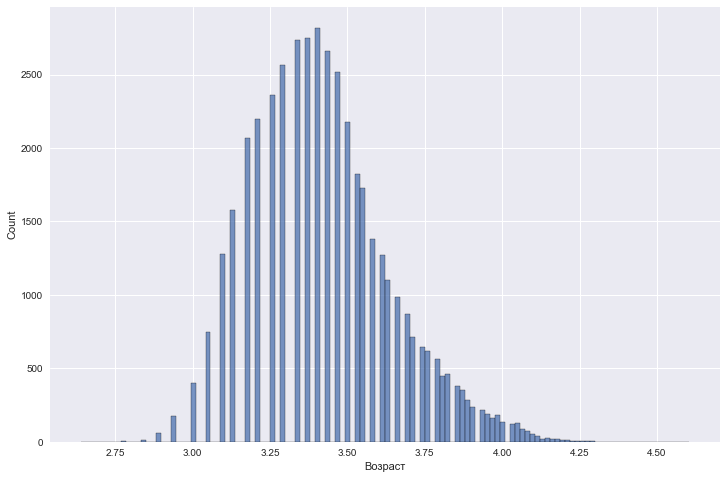

In [188]:
log_age = np.log(hh_df['Возраст'])
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(12,8))
sns.histplot(
    x=log_age    
)
plt.show()

In [189]:
def outliers_z_score_mod(data, feature, left=3, right=3, bias=1, log_scale=False):
    """Функция получает на вход числовые данные, проводит оценку на наличие выбросов методом z-отклонений и возвращает 
    исключенные данные и очищенные данные

    Args:
        data (pd.DataFrame): Входные данные в формате pd.DataFrame
        feature (srt): Числовой признак, который подвергается анализу и чистке
        log_scale (bool, optional): Булевый аргумент для использования логарифмического масштаба, по-умолчанию False
        left (int, optional): Поправочный коэффициент - соответствует количеству стандартных квадратичных отклонений влево
        right (int, optional): Поправочный коэффициент - соответствует количеству стандартных квадратичных отклонений вправо
        bias (int, optional): Cмещение по оси х для логарифмического масштаба, в случае наличия нулевых значений в данных

    Returns:
        (pd.DataFrame): Возвращает два pd.DataFrame с исключенными данными outliers и очищенными данными cleaned
    """
    # Проверка включения логарифмического масштаба
    if log_scale:
        x = np.log(data[feature]+bias)
    else:
        x = data[feature]
    
    # Вычисление статистических величин
    mu = x.mean() #мат. ожидание
    sigma = x.std() #стандартное отклонение
    
    lower_bound = mu - left * sigma # Определение нижней границы распределения
    upper_bound = mu + right * sigma # Определение верхней границы распределения
    
    # очистка данных
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    
    return outliers, cleaned

outliers, cleaned = outliers_z_score_mod(hh_df, 'Возраст', left=3, right=4, bias=1, log_scale=True)
print(f'Число выбросов по z-методу: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

hh_df=cleaned.copy()

Число выбросов по z-методу: 4
Результирующее число записей: 44488


In [190]:
#Сохраним полученные данные
hh_df.to_csv('data/hh_database_cleared.csv')